In [56]:
from noOccurrence_generator import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [50]:
#show the number of correct classification for both classes and the overall misclassification.
def compare_classPredictions(target,predicted):
    correct_class0 = correct_class1 = 0 #number of correct classifications for both classes
    dataSize = len(target)
    for i in range(0,dataSize):
        targetAux = target[i]
        if targetAux == 0 and targetAux == predicted[i]:
            correct_class0 +=1
        elif targetAux == 1 and targetAux == predicted[i]:
            correct_class1+=1
        else:
            pass
        
    print("Number of class 0 corrected classified: ",correct_class0)
    print("Number of class 1 corrected classified: ",correct_class1)
    print("Missclassified:", dataSize - (correct_class0+correct_class1))
            

# Importing dataset and generating synthetic entries

In [3]:
df = pd.read_csv('larcenyData.csv',encoding='latin1')

In [4]:
df

,Unnamed: 0,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
0,1173,Larceny,E18,2018,3,2,8,42.269224,-71.120853
1,3791,Larceny,D4,2018,10,1,0,42.336750,-71.076628
2,3841,Larceny,C11,2017,8,3,0,42.300605,-71.059230
3,3843,Larceny,C11,2018,5,4,0,42.315267,-71.063069
4,3844,Larceny,C11,2018,3,5,0,42.291108,-71.062811
...,...,...,...,...,...,...,...,...,...
23017,426828,Larceny,D4,2016,6,7,17,42.336951,-71.085748
23018,426829,Larceny,D4,2016,6,7,17,42.336951,-71.085748
23019,426847,Larceny,B2,2018,12,4,0,42.309563,-71.089902
23020,426848,Larceny,B2,2018,12,4,0,42.309563,-71.089902


In [5]:
df.drop('Unnamed: 0',axis = 1, inplace=True)

In [6]:
#no-occurred entries generated from noOccurrence_generator
dfSynthetized = gen_syntheticData(len(df))

In [7]:
dfSynthetized

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
0,not occurred,A15,2016,5,4,17,42.276597,-71.090210
1,not occurred,A7,2016,11,2,14,42.388137,-71.103667
2,not occurred,A7,2017,12,1,1,42.385655,-71.104952
3,not occurred,A1,2016,1,1,11,42.381240,-71.134812
4,not occurred,E18,2016,6,4,19,42.269107,-71.154458
...,...,...,...,...,...,...,...,...
23017,not occurred,C11,2018,1,1,12,42.325894,-71.133283
23018,not occurred,E13,2018,5,5,4,42.272167,-71.070371
23019,not occurred,C11,2016,2,5,10,42.239047,-71.153737
23020,not occurred,C6,2017,7,6,7,42.337944,-71.025189


In [8]:
#dataset containing the larceny occurrencies and the synthetic no-occurrence data
larceny = pd.concat([df,dfSynthetized],axis = 0)

In [9]:
larceny

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long
0,Larceny,E18,2018,3,2,8,42.269224,-71.120853
1,Larceny,D4,2018,10,1,0,42.336750,-71.076628
2,Larceny,C11,2017,8,3,0,42.300605,-71.059230
3,Larceny,C11,2018,5,4,0,42.315267,-71.063069
4,Larceny,C11,2018,3,5,0,42.291108,-71.062811
...,...,...,...,...,...,...,...,...
23017,not occurred,C11,2018,1,1,12,42.325894,-71.133283
23018,not occurred,E13,2018,5,5,4,42.272167,-71.070371
23019,not occurred,C11,2016,2,5,10,42.239047,-71.153737
23020,not occurred,C6,2017,7,6,7,42.337944,-71.025189


# Target column generation

- 1 = larceny occurrence
- 0 = no occurrence

In [10]:
def get_class(offense):
    #return the class of the occurrence: 1-> a larceny occurred 0-> no larceny occurrence
    if(offense == 'Larceny'):
        return 1
    else:
        return 0

In [11]:
larceny['occurred'] = larceny['OFFENSE_CODE_GROUP'].apply(get_class)

In [12]:
larceny

,OFFENSE_CODE_GROUP,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,occurred
0,Larceny,E18,2018,3,2,8,42.269224,-71.120853,1
1,Larceny,D4,2018,10,1,0,42.336750,-71.076628,1
2,Larceny,C11,2017,8,3,0,42.300605,-71.059230,1
3,Larceny,C11,2018,5,4,0,42.315267,-71.063069,1
4,Larceny,C11,2018,3,5,0,42.291108,-71.062811,1
...,...,...,...,...,...,...,...,...,...
23017,not occurred,C11,2018,1,1,12,42.325894,-71.133283,0
23018,not occurred,E13,2018,5,5,4,42.272167,-71.070371,0
23019,not occurred,C11,2016,2,5,10,42.239047,-71.153737,0
23020,not occurred,C6,2017,7,6,7,42.337944,-71.025189,0


In [13]:
larceny.drop('OFFENSE_CODE_GROUP',axis = 1, inplace=True)

# Shuffle the dataset 

In [14]:
larceny = larceny.sample(frac=1).reset_index(drop=True)

In [15]:
larceny

,DISTRICT,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,occurred
0,E5,2018,8,5,10,42.253396,-71.147976,0
1,A7,2017,12,4,3,42.234160,-71.003874,0
2,E18,2016,1,4,21,42.358956,-71.124073,0
3,E18,2016,1,5,16,42.275313,-71.115878,1
4,C11,2016,4,7,20,42.252453,-71.088770,0
...,...,...,...,...,...,...,...,...
46039,D14,2017,4,6,5,42.350420,-71.171219,1
46040,D4,2016,7,5,1,42.341868,-71.072722,1
46041,D4,2017,7,7,1,42.274728,-71.062253,0
46042,A15,2017,7,3,16,42.355216,-71.060129,1


# Dummy variables

In [16]:
larceny = pd.get_dummies(larceny,columns=['DISTRICT'],drop_first=True)

In [17]:
larceny.columns

Index(['YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Lat', 'Long', 'occurred',
       'DISTRICT_A15', 'DISTRICT_A7', 'DISTRICT_B2', 'DISTRICT_B3',
       'DISTRICT_C11', 'DISTRICT_C6', 'DISTRICT_D14', 'DISTRICT_D4',
       'DISTRICT_E13', 'DISTRICT_E18', 'DISTRICT_E5'],
      dtype='object')

In [18]:
larceny

,YEAR,MONTH,DAY_OF_WEEK,HOUR,Lat,Long,occurred,DISTRICT_A15,DISTRICT_A7,DISTRICT_B2,DISTRICT_B3,DISTRICT_C11,DISTRICT_C6,DISTRICT_D14,DISTRICT_D4,DISTRICT_E13,DISTRICT_E18,DISTRICT_E5
0,2018,8,5,10,42.253396,-71.147976,0,0,0,0,0,0,0,0,0,0,0,1
1,2017,12,4,3,42.234160,-71.003874,0,0,1,0,0,0,0,0,0,0,0,0
2,2016,1,4,21,42.358956,-71.124073,0,0,0,0,0,0,0,0,0,0,1,0
3,2016,1,5,16,42.275313,-71.115878,1,0,0,0,0,0,0,0,0,0,1,0
4,2016,4,7,20,42.252453,-71.088770,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46039,2017,4,6,5,42.350420,-71.171219,1,0,0,0,0,0,0,1,0,0,0,0
46040,2016,7,5,1,42.341868,-71.072722,1,0,0,0,0,0,0,0,1,0,0,0
46041,2017,7,7,1,42.274728,-71.062253,0,0,0,0,0,0,0,0,1,0,0,0
46042,2017,7,3,16,42.355216,-71.060129,1,1,0,0,0,0,0,0,0,0,0,0


# EDA

<Figure size 1080x720 with 0 Axes>

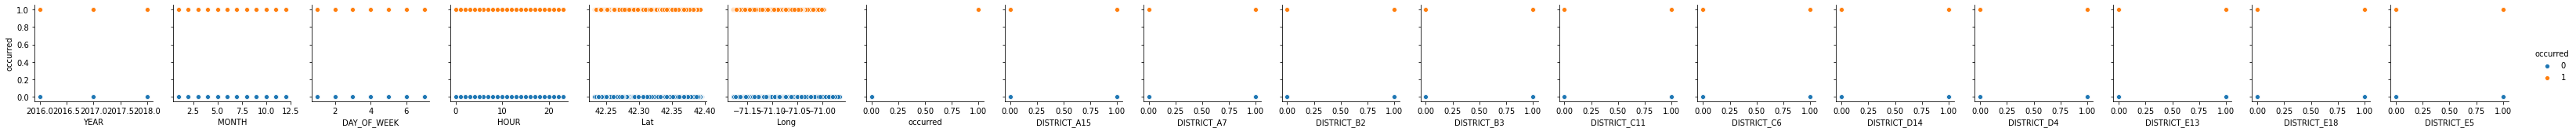

In [19]:
xVars = larceny.columns.tolist()
plt.figure(figsize=(15,10))
sns.pairplot(data = larceny,hue = "occurred",y_vars=['occurred'],x_vars=xVars)

In [20]:
#sns.swarmplot(data = larceny)

# Train and test sets split

In [21]:
y = larceny['occurred']
X = larceny.drop(['occurred'],axis = 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
type(y_train)

pandas.core.series.Series

In [24]:
type(y_test)

pandas.core.series.Series

## KFold

In [25]:
kfold = KFold(n_splits=5,shuffle=True,random_state=116)

# Evaluating models

## Defining models

### 1)KNN

In [26]:
knnPipeline = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('model',KNeighborsClassifier())
]
)

### 2) Random Forest 

In [27]:
rfcPipeline = Pipeline(steps=[
    ('model',RandomForestClassifier())
]
)

## Evaluate

In [28]:
models = [
    ('knn',knnPipeline),
    ('rfc',rfcPipeline)
]

In [29]:
results = {}
names = []
scoring = 'accuracy'

In [30]:
for name,model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results[name] = cv_results

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/base.p

In [31]:
results

{'knn': array([0.90400695, 0.90726463, 0.90596156, 0.90183516, 0.90551694]),
 'rfc': array([0.96905201, 0.9681833 , 0.97263547, 0.96535997, 0.96665943])}

In [32]:
average_results = {}
for key in results.keys():
    average_results[key] = np.sqrt(results[key]).sum()/5

In [33]:
average_results

{'knn': 0.9512707780546219, 'rfc': 0.9840612038438328}

## Comparing predictions results and scores for Random Forest.

In [34]:
rfcPipeline.fit(X_train,y_train)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [35]:
#predictions
train_predictions = rfcPipeline.predict(X_train)
test_predictions =rfcPipeline.predict(X_test)

In [36]:
rfcPipeline.score(X_train,y_train)

0.9984486503257834

In [37]:
rfcPipeline.score(X_test,y_test)

0.9633704937020414

In [42]:
compare_classPredictions(y_train.tolist(),train_predictions.tolist())

Number of class 0 corrected classified:  16064
Number of class 1 corrected classified:  16116
Missclassified: 50


In [43]:
compare_classPredictions(y_test.tolist(),test_predictions.tolist())

Number of class 0 corrected classified:  6679
Number of class 1 corrected classified:  6629
Missclassified: 506


In [53]:
confusion_matrix(y_train, train_predictions)

array([[16064,    21],
       [   29, 16116]])

In [54]:
confusion_matrix(y_test,test_predictions)

array([[6679,  258],
       [ 248, 6629]])

In [40]:
#larceny.to_csv('larcenySyntetic.csv',index=False)